# KNN代码

## 手写方法实现KNN算法

In [52]:
import numpy as np
import pandas as pd

In [40]:
# 训练数据
rowdata = {'颜色深度':[14.23,13.2,13.16,14.37,13.24,12.07,12.43,11.79,12.37,12.04],
          '酒精浓度':[5.64,4.38,5.68,4.80,4.32,2.76,3.94,3.  ,2.12,2.6 ],
          '品种':[0,0,0,0,0,1,1,1,1,1]}

In [3]:
# 0 代表 “黑皮诺”，1 代表 “赤霞珠” 

new_data = np.array([12.8,4.1])

In [41]:
# 将数据保存成DataFrame
wine_data = pd.DataFrame(rowdata)

In [10]:
wine_data

NameError: name 'wine_data' is not defined

In [50]:
# 导入可视化的包
import matplotlib.pyplot as plt

In [7]:
# 提取特征数据
wine_data[['颜色深度','酒精浓度']]

,颜色深度,酒精浓度
0,14.23,5.64
1,13.20,4.38
2,13.16,5.68
3,14.37,4.80
4,13.24,4.32
5,12.07,2.76
6,12.43,3.94
7,11.79,3.00
8,12.37,2.12
9,12.04,2.60


In [44]:
X = np.array(wine_data.iloc[:,:-1])
X

array([[14.23,  5.64],
       [13.2 ,  4.38],
       [13.16,  5.68],
       [14.37,  4.8 ],
       [13.24,  4.32],
       [12.07,  2.76],
       [12.43,  3.94],
       [11.79,  3.  ],
       [12.37,  2.12],
       [12.04,  2.6 ]])

In [38]:
# 提取出特征数据X
X = wine_data.iloc[:,:-1].values
X

array([[14.23,  5.64],
       [13.2 ,  4.38],
       [13.16,  5.68],
       [14.37,  4.8 ],
       [13.24,  4.32],
       [12.07,  2.76],
       [12.43,  3.94],
       [11.79,  3.  ],
       [12.37,  2.12],
       [12.04,  2.6 ]])

In [20]:
y = wine_data.iloc[:, -1].values
y

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

In [21]:
X = np.array(wine_data.iloc[:,0:2])


array([[14.23,  5.64],
       [13.2 ,  4.38],
       [13.16,  5.68],
       [14.37,  4.8 ],
       [13.24,  4.32],
       [12.07,  2.76],
       [12.43,  3.94],
       [11.79,  3.  ],
       [12.37,  2.12],
       [12.04,  2.6 ]])

In [22]:
y == 0

array([ True,  True,  True,  True,  True, False, False, False, False,
       False])

In [26]:
X

array([[14.23,  5.64],
       [13.2 ,  4.38],
       [13.16,  5.68],
       [14.37,  4.8 ],
       [13.24,  4.32],
       [12.07,  2.76],
       [12.43,  3.94],
       [11.79,  3.  ],
       [12.37,  2.12],
       [12.04,  2.6 ]])

In [45]:
X[y==0 ]

array([[14.23,  5.64],
       [13.2 ,  4.38],
       [13.16,  5.68],
       [14.37,  4.8 ],
       [13.24,  4.32]])

In [47]:
X[y==0 , 0]

array([14.23, 13.2 , 13.16, 14.37, 13.24])

In [48]:
X[y==0 , 1]

array([5.64, 4.38, 5.68, 4.8 , 4.32])

In [49]:
X[y == 1, 0]

array([12.07, 12.43, 11.79, 12.37, 12.04])

In [50]:
X[y == 1, 1]

array([2.76, 3.94, 3.  , 2.12, 2.6 ])

In [23]:
y == 1

array([False, False, False, False, False,  True,  True,  True,  True,
        True])

In [34]:
# 查看所有可用风格
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [52]:
# 切换绘图风格
plt.style.use("ggplot")

In [57]:
# plt.rcParams['font.sans-serif'] = 'SimHei' ## 设置中文显示
plt.rcParams['font.family']='Arial Unicode MS'
plt.rcParams['axes.unicode_minus'] = False

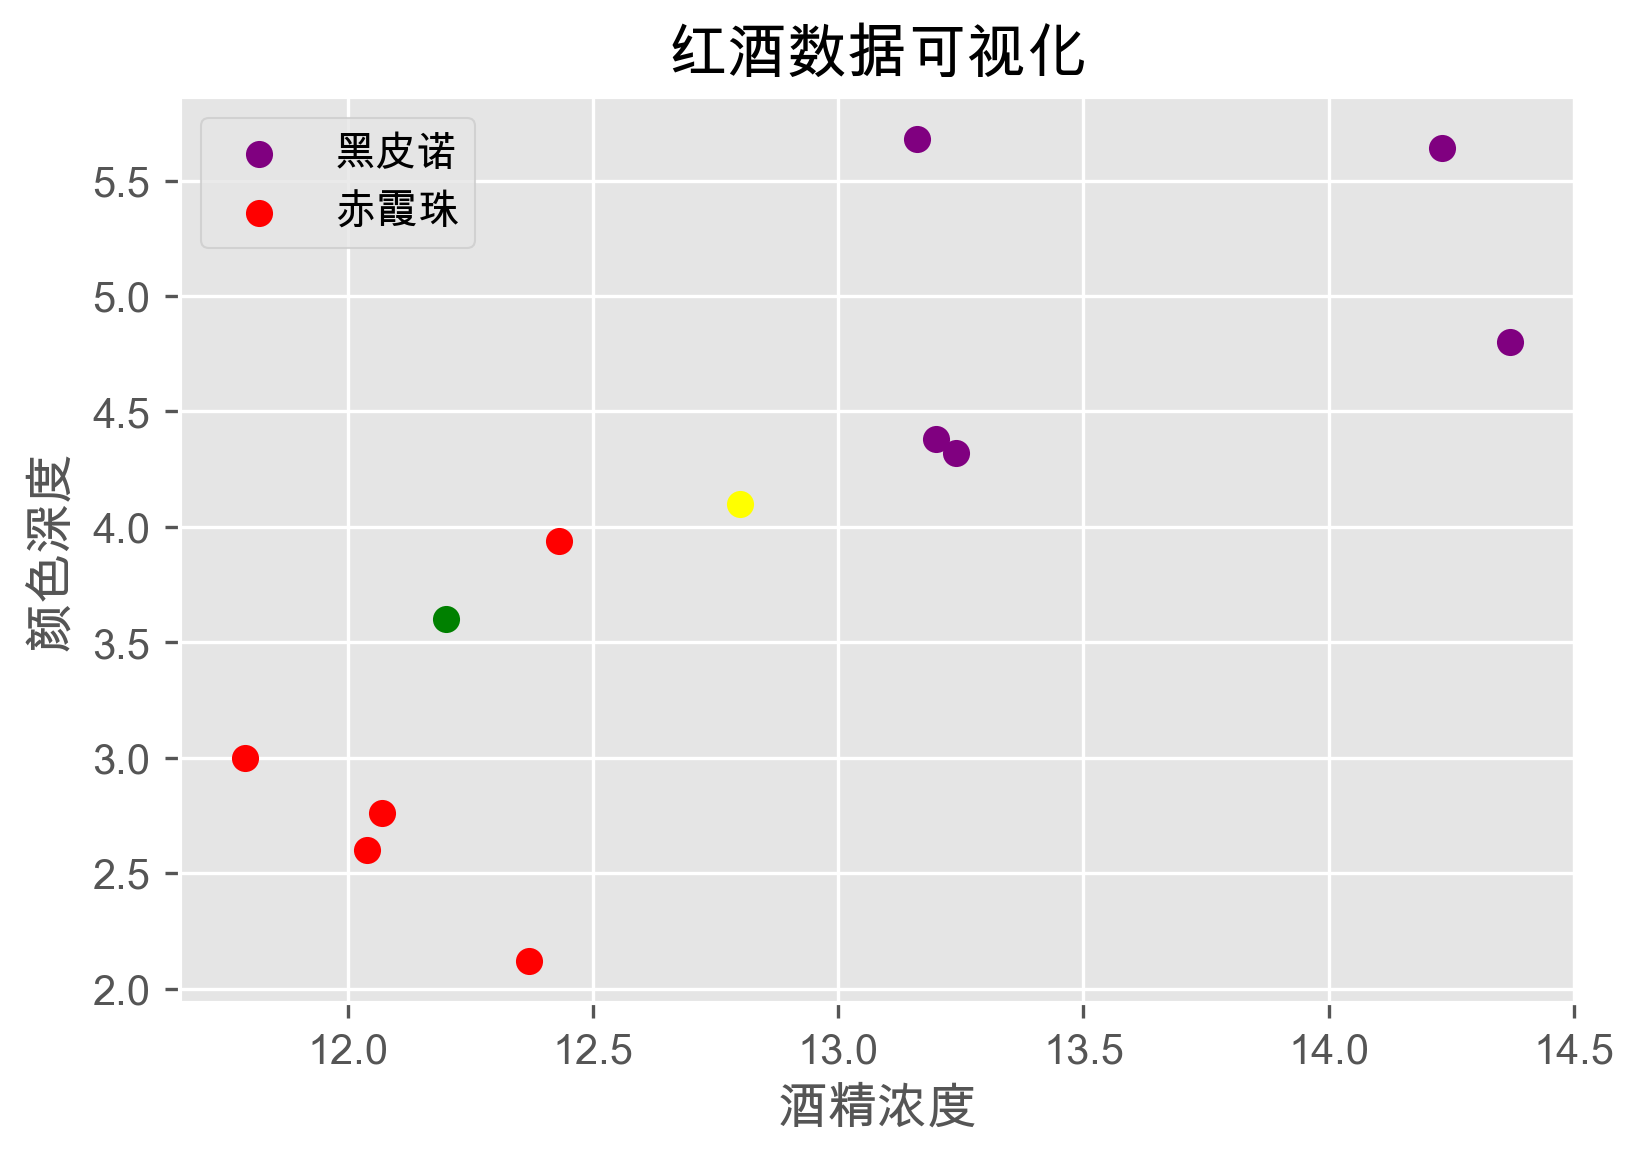

In [130]:
# 改变图片大小
plt.figure(figsize=(6,4), dpi=300)
# 添加图片标题
plt.title('红酒数据可视化')
# 添加图片标签
plt.xlabel('酒精浓度')
plt.ylabel('颜色深度')

plt.scatter(X[y==0 , 0] ,X[y==0 , 1] , c='purple' ,label='黑皮诺') #size   # color
plt.scatter(X[y==1, 0] , X[y==1 , 1] , c = 'red', label = '赤霞珠')
plt.scatter(new_data[0] , new_data[1] , c='yellow')
plt.scatter( 12.2 ,3.6 ,  c='green')

# 生成图例
plt.legend()

## 手动实现KNN算法

In [91]:
X

array([[14.23,  5.64],
       [13.2 ,  4.38],
       [13.16,  5.68],
       [14.37,  4.8 ],
       [13.24,  4.32],
       [12.07,  2.76],
       [12.43,  3.94],
       [11.79,  3.  ],
       [12.37,  2.12],
       [12.04,  2.6 ]])

In [92]:
X[0] - new_data

array([1.43, 1.54])

In [93]:
# 算出第一个样本点的距离
np.sqrt(np.sum((X[0] - new_data)**2))

2.101547049199708

In [94]:
# 批量计算所有样本点的距离
distance = np.sqrt(np.sum((X - new_data)**2 ,axis=1 ))
distance

array([2.10154705, 0.48826222, 1.62049375, 1.71898226, 0.49193496,
       1.52594233, 0.40311289, 1.49335193, 2.02615399, 1.68154691])

In [120]:
# 定义k值
k = 1

In [121]:
# 对数据按照索引进行排序
np.argsort(distance)

array([6, 1, 4, 7, 5, 2, 9, 3, 8, 0], dtype=int64)

In [123]:
# 提取排序后最小的及格样本
np.argsort(distance)[:k]

array([6], dtype=int64)

In [124]:
# 把这几个最小的样本对应的分类结果提取出来
topK = [y[i] for i in np.argsort(distance)[:k]]
topK

[1]

In [125]:
# 转换成Series
sk = pd.Series(topK)
sk

0    1
dtype: int64

In [111]:
sk.value_counts()

0    2
1    1
dtype: int64

In [126]:
# 统计出其中哪个分类出现的次数最多, 使用mode 众数功能
sk.mode()[0]

1

### 把代码整合成函数

In [128]:
def KNN(X,new_data , k ):
    """函数功能: KNN分类器实现
    参数:
    X: 测试数据集
    new_data: 带预测数据
    k: 超参数, 取多少个最近的样本点进行分类"""
    # 批量计算所有样本点的距离
    distance = np.sqrt(np.sum((X - new_data)**2 ,axis=1 ))

#     # 提取排序后最小的及格样本
#     np.argsort(distance)[:k]
    # 把这几个最小的样本对应的分类结果提取出来
    topK = [y[i] for i in np.argsort(distance)[:k]]

    # 转换成Series
    sk = pd.Series(topK)

    # 统计出其中哪个分类出现的次数最多, 使用mode 众数功能
    return sk.mode()[0]

In [139]:
KNN(X,[12.7 ,4 ] , 5)

1

## Scikit-learn 算法库实现KNN

In [140]:
# 导入算法库,查看版本
import sklearn

In [142]:
sklearn.__version__

'0.20.3'

In [45]:
# 先导入需要的算法模型
from sklearn.neighbors import KNeighborsClassifier

In [160]:
# 使用算法类, 实例化一个算法的对象
# 首先,先给你的模型起一个名字
#  传入算法所需的超参数 k = 3
knn = KNeighborsClassifier(n_neighbors=3 )

In [146]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [147]:
X

array([[14.23,  5.64],
       [13.2 ,  4.38],
       [13.16,  5.68],
       [14.37,  4.8 ],
       [13.24,  4.32],
       [12.07,  2.76],
       [12.43,  3.94],
       [11.79,  3.  ],
       [12.37,  2.12],
       [12.04,  2.6 ]])

In [148]:
y

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

In [161]:
# 使用训练集数据对算法进行训练
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [154]:
new_data.reshape(1,2)

array([[12.8,  4.1]])

In [155]:
new_data

array([12.8,  4.1])

In [169]:
# 随便生成几个数据进行预测
test = np.array([[12.8,4.1],[12.3, 6.4],[8.7, 4.2]])

In [174]:
test

array([[12.8,  4.1],
       [12.3,  6.4],
       [ 8.7,  4.2]])

In [152]:
X

array([[14.23,  5.64],
       [13.2 ,  4.38],
       [13.16,  5.68],
       [14.37,  4.8 ],
       [13.24,  4.32],
       [12.07,  2.76],
       [12.43,  3.94],
       [11.79,  3.  ],
       [12.37,  2.12],
       [12.04,  2.6 ]])

In [162]:
# 使用这个模型,对新的数据进行预测
knn.predict(new_data.reshape(1,2))

array([0], dtype=int64)

In [175]:
# 使用这个模型,对新的数据进行预测
knn.predict(test)

array([0, 0, 1], dtype=int64)

In [173]:
# 算法评估, 算法的准确率
# 传入两部分内容, 第一个: 预测数据  第二个: 预测数据的真实值
knn.score(new_data.reshape(1,2),[0] )


1.0

In [180]:
knn.score(test ,[0,0,0] )
# [0, 0, 1]

0.6666666666666666

In [182]:
# 输出预测概率
knn.predict_proba(new_data.reshape(1,2))

array([[0.66666667, 0.33333333]])

In [185]:
knn.kneighbors()

(array([[0.85158675, 1.0707474 , 1.62742127],
        [0.07211103, 0.88684835, 1.24310096],
        [1.0707474 , 1.30061524, 1.36235091],
        [0.85158675, 1.22772147, 1.24310096],
        [0.07211103, 0.89470666, 1.22772147],
        [0.16278821, 0.36878178, 0.70682388],
        [0.88684835, 0.89470666, 1.13718952],
        [0.36878178, 0.47169906, 1.05394497],
        [0.58249464, 0.70682388, 1.05394497],
        [0.16278821, 0.47169906, 0.58249464]]), array([[3, 2, 1],
        [4, 6, 3],
        [0, 1, 4],
        [0, 4, 1],
        [1, 6, 3],
        [9, 7, 8],
        [1, 4, 7],
        [5, 9, 8],
        [9, 5, 7],
        [5, 7, 8]], dtype=int64))

In [187]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

## 学习曲线

In [189]:
# 使用乳腺癌数据集
# sklearn里面内置的数据集

In [5]:
# 导入函数
from sklearn.datasets import load_breast_cancer

In [6]:
# 载入数据
breast_cancer = load_breast_cancer()

In [198]:
# 查看字典里面的key
breast_cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
# 封装的我们的数据, 样本特征
breast_cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [8]:
# 目标标签
breast_cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [206]:
# 分类标签名称
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [208]:
# 数据集介绍
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [209]:
# 特征名称
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [213]:
name = ['平均半径','平均纹理','平均周长','平均面积',
        '平均光滑度','平均紧凑度','平均凹度',
        '平均凹点','平均对称','平均分形维数',
        '半径误差','纹理误差','周长误差','面积误差',
        '平滑度误差','紧凑度误差','凹度误差',
        '凹点误差','对称误差',
        '分形维数误差','最差半径','最差纹理',
        '最差的边界','最差的区域','最差的平滑度',
        '最差的紧凑性','最差的凹陷','最差的凹点',
        '最差的对称性','最差的分形维数']

In [210]:
# 文件下载文件夹
breast_cancer.filename

'D:\\Anaconda3\\lib\\site-packages\\sklearn\\datasets\\data\\breast_cancer.csv'

## 把数据集构造成一个DataFrame

In [215]:
# 把数据集构造成一个DataFrame
df = pd.DataFrame(breast_cancer.data , columns=name)

In [216]:
df['分类标签'] = breast_cancer.target

In [217]:
df

,平均半径,平均纹理,平均周长,平均面积,平均光滑度,平均紧凑度,平均凹度,平均凹点,平均对称,平均分形维数,...,最差纹理,最差的边界,最差的区域,最差的平滑度,最差的紧凑性,最差的凹陷,最差的凹点,最差的对称性,最差的分形维数,分类标签
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,0
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,0
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,0
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,0
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,0
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,...,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440,0
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,...,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368,0
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,...,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,0
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,...,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,0
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,...,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,0


### 划分训练集和测试集

In [1]:
# 划分训练集和测试集
from sklearn.model_selection import train_test_split

In [234]:
# 切割训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data , breast_cancer.target , test_size=0.3,
                                                   random_state = 666)

In [247]:
# 建立模型
# 实例化
knn = KNeighborsClassifier(n_neighbors=9)

In [248]:
# 对数据进行训练
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

In [249]:
# 对测试数据进行评分
knn.score(X_test, y_test)

0.9532163742690059

### 写一个循环, 测试不同的k值对应的分数

In [260]:
scores = []
# k值从1 调节到 20
for i in range(1, 31):
    # 建立模型
    # 实例化
    knn = KNeighborsClassifier(n_neighbors=i)
    # 对数据进行训练
    knn.fit(X_train, y_train)
    # 对测试数据进行评分
    scores.append(knn.score(X_test, y_test))

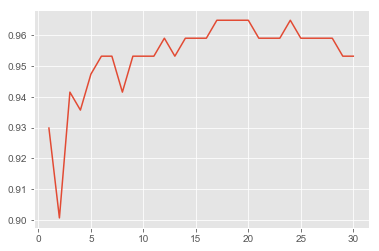

In [262]:
# 绘制一个随着k值变化的分数变化曲线
plt.plot(range(1, 31),scores)

In [266]:
# 查看一下最大的分数是多少
max(scores)

0.9649122807017544

In [265]:
# 第一个最高的分数
np.argmax(scores)

16

In [264]:
scores

[0.9298245614035088,
 0.9005847953216374,
 0.9415204678362573,
 0.935672514619883,
 0.9473684210526315,
 0.9532163742690059,
 0.9532163742690059,
 0.9415204678362573,
 0.9532163742690059,
 0.9532163742690059,
 0.9532163742690059,
 0.9590643274853801,
 0.9532163742690059,
 0.9590643274853801,
 0.9590643274853801,
 0.9590643274853801,
 0.9649122807017544,
 0.9649122807017544,
 0.9649122807017544,
 0.9649122807017544,
 0.9590643274853801,
 0.9590643274853801,
 0.9590643274853801,
 0.9649122807017544,
 0.9590643274853801,
 0.9590643274853801,
 0.9590643274853801,
 0.9590643274853801,
 0.9532163742690059,
 0.9532163742690059]

## 不设置随机数种子切分数据

In [287]:
# 切割训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data , breast_cancer.target , test_size=0.3,random_state = 666)

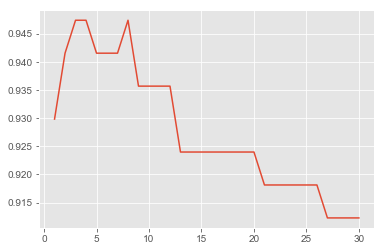

In [278]:
scores = []
# k值从1 调节到 20
for i in range(1, 31):
    # 建立模型
    # 实例化
    knn = KNeighborsClassifier(n_neighbors=i)
    # 对数据进行训练
    knn.fit(X_train, y_train)
    # 对测试数据进行评分
    scores.append(knn.score(X_test, y_test))
# 绘制一个随着k值变化的分数变化曲线
plt.plot(range(1, 31),scores)

## 交叉验证

In [2]:
# 导入交叉验证函数
from sklearn.model_selection import cross_val_score

In [294]:
# 先实例化模型
knn = KNeighborsClassifier(n_neighbors=16)

In [295]:
# 调用交叉验证函数,进行交叉验证
cross_result = cross_val_score(knn,X_train , y_train, cv = 5)

In [296]:
cross_result

array([0.9125   , 0.925    , 0.95     , 0.9125   , 0.8974359])

In [297]:
# 模型效果平均值
cross_result.mean()

0.9194871794871794

In [293]:
# 模型效果的方差, 看一下预测的不稳定性
cross_result.var()

0.0003090647600262979

### 绘制交叉验证学习曲线

In [298]:
# 切割训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data , breast_cancer.target , test_size=0.3,random_state = 666)

In [314]:
cross_result.var()

0.0002161160420775813

In [329]:
# 用于储存分数
scores = []
# 1 - 30
# 用户储存方差
var = []
for i in range(1,21):
    # 先实例化模型
    knn = KNeighborsClassifier(n_neighbors=i)
    # 调用交叉验证函数,进行交叉验证
    cross_result = cross_val_score(knn,X_train , y_train, cv = 5)
    # 求平均值
    mean = cross_result.mean()#
    # 求方差
    cross_result_var = cross_result.var()
    scores.append(mean)
    var.append(cross_result_var)

In [340]:
np.array(scores)

array([0.90705128, 0.90448718, 0.91705128, 0.91198718, 0.92711538,
       0.92461538, 0.92467949, 0.92211538, 0.91967949, 0.92461538,
       0.91705128, 0.92455128, 0.92705128, 0.92705128, 0.91698718,
       0.91948718, 0.91442308, 0.91442308, 0.90692308, 0.90448718])

In [327]:
np.array(scores) + np.array(var) * 2

array([0.90724392, 0.90557454, 0.91713687, 0.91251492, 0.92717041,
       0.92474157, 0.92478928, 0.92241272, 0.91985787, 0.92511657,
       0.91763687, 0.92482533, 0.92750482, 0.92750482, 0.91760018,
       0.92010531, 0.9152892 , 0.9157892 , 0.90792189, 0.90507454,
       0.89982959, 0.90507454, 0.89982959, 0.9099348 , 0.89982959,
       0.90263536, 0.90469954, 0.9099348 , 0.9099348 , 0.90241941])

In [325]:
np.array(var) * 2

array([1.92636423e-04, 1.08736029e-03, 8.55851414e-05, 5.27744905e-04,
       5.50295858e-05, 1.26183432e-04, 1.09796187e-04, 2.97337278e-04,
       1.78385930e-04, 5.01183432e-04, 5.85585141e-04, 2.74046680e-04,
       4.53533859e-04, 4.53533859e-04, 6.13001315e-04, 6.18129520e-04,
       8.66124260e-04, 1.36612426e-03, 9.98816568e-04, 5.87360289e-04,
       4.06508876e-04, 5.87360289e-04, 4.06508876e-04, 4.47616700e-04,
       4.06508876e-04, 7.12278107e-04, 2.12360289e-04, 4.47616700e-04,
       4.47616700e-04, 4.32232084e-04])

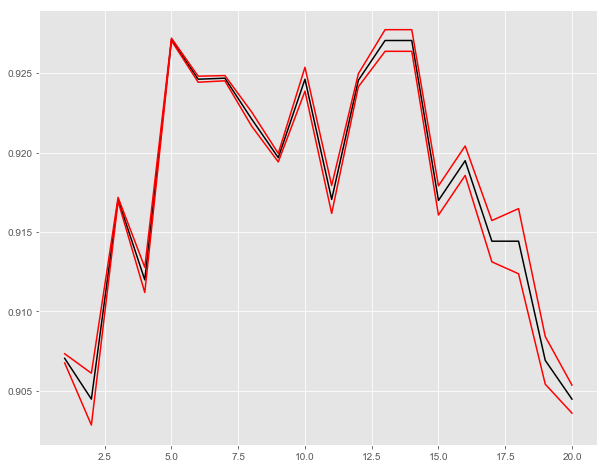

In [335]:
# 绘制交叉验证学习曲线
plt.figure(figsize=(10,8))
plt.plot(range(1,21),scores,color= 'black' )
plt.plot(range(1,21) ,np.array(scores) + np.array(var) * 3 , color='red' )
plt.plot(range(1,21) ,np.array(scores) - np.array(var) * 3 , color='red' )

In [338]:
# 找出最大分数
np.array(scores).max()

0.9271153846153848

In [344]:
# 最大分数的k值
np.array(scores).argmax() + 1

5

In [341]:
# 使用交叉验证之后,得到的最优k值, 去重新实例化我们的模型, 然后对测试集进行预测

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)

knn.score(X_test, y_test)

## 对数据进行标准化之后再建模

In [26]:
# 封装的我们的数据, 样本特征
X = breast_cancer.data
X
y = breast_cancer.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [27]:
# 切割训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=0.3,
                                                   random_state = 666)

In [29]:
# 导入归一化的包
from sklearn.preprocessing import MinMaxScaler

In [30]:
# 对模型进行实例化
min_max = MinMaxScaler()

In [31]:
# 对数据进行训练
min_max.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [34]:
# 使用训练好的模型对数据进行转化
X_min_max = min_max.transform(X_train)

In [35]:
X_min_max

array([[0.50438317, 0.45435685, 0.49708351, ..., 0.67835052, 0.29469742,
        0.19670733],
       [0.31877173, 0.44896266, 0.31647461, ..., 0.46013746, 0.19101124,
        0.15440115],
       [0.39468142, 0.4373444 , 0.38896002, ..., 0.50824742, 0.47861226,
        0.33687525],
       ...,
       [0.55090847, 0.4813278 , 0.53834116, ..., 0.61477663, 0.19436231,
        0.07116621],
       [0.24629022, 0.33029046, 0.23516859, ..., 0.12412371, 0.11827321,
        0.0341729 ],
       [0.76002743, 0.71618257, 0.75103144, ..., 0.89106529, 0.30317366,
        0.20812016]])

In [36]:
# 在建立一个新的转化模型
min_max_2 = MinMaxScaler()

In [37]:
# 把 fit 训练功能 和 transform转化功能结合在一起运行
min_max_2.fit_transform(X_train)

array([[0.50438317, 0.45435685, 0.49708351, ..., 0.67835052, 0.29469742,
        0.19670733],
       [0.31877173, 0.44896266, 0.31647461, ..., 0.46013746, 0.19101124,
        0.15440115],
       [0.39468142, 0.4373444 , 0.38896002, ..., 0.50824742, 0.47861226,
        0.33687525],
       ...,
       [0.55090847, 0.4813278 , 0.53834116, ..., 0.61477663, 0.19436231,
        0.07116621],
       [0.24629022, 0.33029046, 0.23516859, ..., 0.12412371, 0.11827321,
        0.0341729 ],
       [0.76002743, 0.71618257, 0.75103144, ..., 0.89106529, 0.30317366,
        0.20812016]])

In [38]:
# 测试数据也需要先进行归一化,再带入到模型中去
X_test

array([[1.866e+01, 1.712e+01, 1.214e+02, ..., 1.674e-01, 2.894e-01,
        8.456e-02],
       [1.286e+01, 1.332e+01, 8.282e+01, ..., 1.155e-01, 2.382e-01,
        8.553e-02],
       [1.152e+01, 1.875e+01, 7.334e+01, ..., 6.316e-02, 3.306e-01,
        7.036e-02],
       ...,
       [1.150e+01, 1.845e+01, 7.328e+01, ..., 6.544e-02, 2.740e-01,
        6.487e-02],
       [1.287e+01, 1.621e+01, 8.238e+01, ..., 5.780e-02, 3.604e-01,
        7.062e-02],
       [1.398e+01, 1.962e+01, 9.112e+01, ..., 1.827e-01, 3.179e-01,
        1.055e-01]])

In [42]:
# 对测试集进行转化时,不再需要进行训练,直接使用transform方法进行转化
X_test_min_max = min_max_2.transform(X_test)

In [43]:
X_test_min_max

array([[0.53719575, 0.30746888, 0.52269171, ..., 0.57525773, 0.26197516,
        0.19362456],
       [0.25314658, 0.14979253, 0.24825722, ..., 0.39690722, 0.16104869,
        0.19998688],
       [0.18752143, 0.37510373, 0.18082231, ..., 0.21704467, 0.34318943,
        0.10048537],
       ...,
       [0.18654195, 0.3626556 , 0.1803955 , ..., 0.22487973, 0.23161837,
        0.06447593],
       [0.25363632, 0.26970954, 0.24512733, ..., 0.19862543, 0.4019318 ,
        0.10219074],
       [0.30799745, 0.41120332, 0.30729834, ..., 0.62783505, 0.31815494,
        0.33097206]])

### 使用归一化之后的数据重新进行交叉验证学习

In [55]:
import numpy as np
import pandas as pd
# 导入可视化的包
import matplotlib.pyplot as plt

In [46]:
# 用于储存分数
scores = []
# 1 - 30
# 用户储存方差
var = []
for i in range(1,21):
    # 先实例化模型
    knn = KNeighborsClassifier(n_neighbors=i)
    # 调用交叉验证函数,进行交叉验证
    cross_result = cross_val_score(knn,X_min_max , y_train, cv = 5)
    # 求平均值
    mean = cross_result.mean()#
    # 求方差
    cross_result_var = cross_result.var()
    scores.append(mean)
    var.append(cross_result_var)

In [ ]:
array([0.90705128, 0.90448718, 0.91705128, 0.91198718, 0.92711538,
       0.92461538, 0.92467949, 0.92211538, 0.91967949, 0.92461538,
       0.91705128, 0.92455128, 0.92705128, 0.92705128, 0.91698718,
       0.91948718, 0.91442308, 0.91442308, 0.90692308, 0.90448718])

In [47]:
scores

[0.9521794871794873,
 0.9423717948717949,
 0.9596794871794871,
 0.9596794871794871,
 0.9621794871794872,
 0.9597435897435898,
 0.9621153846153845,
 0.9596153846153846,
 0.9544871794871795,
 0.9570512820512821,
 0.9594871794871794,
 0.9544871794871795,
 0.9544871794871795,
 0.954551282051282,
 0.9544871794871795,
 0.9519871794871795,
 0.9569871794871794,
 0.9544871794871795,
 0.9569871794871794,
 0.9569871794871796]

In [48]:
var

[0.00047252629848783717,
 0.0013417324128862586,
 0.0002898339907955299,
 0.0002898339907955299,
 0.00045393655489809356,
 0.0005928911900065742,
 0.0005919378698224844,
 0.0006150147928994078,
 0.001094962195923734,
 0.0008286900065746224,
 0.0011500904010519387,
 0.0012199621959237336,
 0.001094962195923734,
 0.0008889464168310327,
 0.001094962195923734,
 0.0011423980933596314,
 0.0010975262984878362,
 0.001094962195923734,
 0.0010975262984878362,
 0.0011600262984878362]

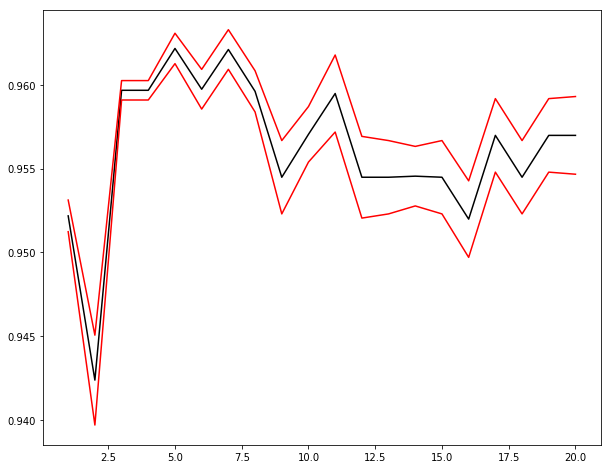

In [54]:
# 绘制交叉验证学习曲线
plt.figure(figsize=(10,8))
plt.plot(range(1,21),scores,color= 'black' )
plt.plot(range(1,21) ,np.array(scores) + np.array(var) * 2 , color='red' )
plt.plot(range(1,21) ,np.array(scores) - np.array(var) * 2 , color='red' )

In [60]:
#   根据学习曲线, 取k = 7 作为超参数进行学习
scores[6]

0.9621153846153845

In [56]:
# 使用交叉验证之后,得到的最优k值, 去重新实例化我们的模型, 然后对测试集进行预测
knn = KNeighborsClassifier(n_neighbors=7)
# 进行数据训练
knn.fit(X_train,y_train)
# 进行测试集分数评估
knn.score(X_test, y_test)

0.9532163742690059